# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 



billboard_df= pd.read_csv('../billboard_data/billboardHot100_1999-2019.csv')
song_attributes_df= pd.read_csv('../billboard_data/songAttributes_1999-2019.csv')
grammy_albums_df=pd.read_csv('../billboard_data/grammyAlbums_199-2019.csv')
grammy_songs_df= pd.read_csv('../billboard_data/grammySongs_1999-2019.csv')
artist_df = pd.read_csv('../billboard_data/artistDf.csv')

#So far, uploading pandas and numpy to perform numerical and exploratory analysis on the data files I've uploaded
# Not sure I will end up utilizing information from all of the different files available for this dataset on 
# kaggle, but importing the ones I think may be relevant in order to tell my data story in order to explore them
# and determine which ones will best contribute. 

# I've also uploaded the necessary libraries to handle the visualization of my data. 


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
billboard_df.head(2)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,7/6/19,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,7/6/19,21-Jun-19,Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN


In [3]:
billboard_df.info()

#making note of where data is missing... Peak.position and weeks.on.chart are two columns I plan on relying 
#heavily on in order to create a story about the data, will likely end up dropping those rows even though there
# are nearly 7,000 rows will null values in those categories. If the data is comprehensive, I should be able 
# to determine peak position and weeks on chart through some evaluating and fill those numbers in. 
# I will have to determine if it is worth the additional data after some looking around. 

# other potential problematic areas would be the date null values. 
# I had planned on utilizing the date column to look at the relationship between song release date and time to 
# get to number 1, but with nearly 13,000 rows of data missing on this one, I may have to reconsider. I will keep 
# the rows missing this information to utilize for other analyizing. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       97225 non-null  int64  
 1   Artists          97225 non-null  object 
 2   Name             97225 non-null  object 
 3   Weekly.rank      97225 non-null  int64  
 4   Peak.position    90156 non-null  float64
 5   Weeks.on.chart   90156 non-null  float64
 6   Week             97225 non-null  object 
 7   Date             84978 non-null  object 
 8   Genre            97225 non-null  object 
 9   Writing.Credits  90012 non-null  object 
 10  Lyrics           97225 non-null  object 
 11  Features         21289 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 8.9+ MB


In [4]:
billboard_df.describe()

## numerical columns, checking out their numbers - 'Unnamed: 0' will be dropped. 

,Unnamed: 0,Weekly.rank,Peak.position,Weeks.on.chart
count,97225.000000,97225.000000,90156.00000,90156.000000
mean,48613.000000,50.452373,36.58665,12.542948
std,28066.584298,28.816813,27.36506,9.123191
min,1.000000,1.000000,1.00000,0.000000
25%,24307.000000,26.000000,11.00000,6.000000
50%,48613.000000,50.000000,33.00000,11.000000
75%,72919.000000,75.000000,59.00000,17.000000
max,97225.000000,100.000000,100.00000,87.000000


**Weekly.rank** Average weekly rank is 50, indicates we have pretty complete data. There should be one occurance of each position, 1-100 for every week. Quartiles confirm this.

**Peak.Position** Songs hits a top spot of 36 on average - will be interested to see if these changes over the years

**Weeks.on.chart** Average song hits 12 weeks on the chart. The min here shows a potential error. How can a song have zero weeks on the chart? Big shift from 3 quartile and the max. Possible outlier. 

In [101]:


billboard_df.drop(columns='Unnamed: 0', inplace=True)


billboard_df.corr()

,Weekly.rank,Peak.position,Weeks.on.chart,Year,Month
Weekly.rank,1.000000,0.823589,-0.323926,0.000246,-0.002119
Peak.position,0.823589,1.000000,-0.549217,-0.023591,-0.006285
Weeks.on.chart,-0.323926,-0.549217,1.000000,0.069097,-0.024423
Year,0.000246,-0.023591,0.069097,1.000000,-0.072281
Month,-0.002119,-0.006285,-0.024423,-0.072281,1.000000


Could be a negative correlation between Weeks.on.chart and Peak.position. 

In [5]:
billboard_df.isnull().sum()

#seeing where I have missing values

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64

In [92]:

billboard_df[['Name','Artists']].nunique()


Name       6458
Artists    1957
dtype: int64

Roughly 6,500 songs, spanning 1999-2019 to look at, barring any repeats in song names. 
Interesting to see the number of artists. Many appearing several times. 

In [7]:

#Changing the week dtype to date in order to break out year and month for further EDA. 

billboard_df['Week']= pd.to_datetime(billboard_df['Week'])

billboard_df['Year']=billboard_df['Week'].dt.year

billboard_df['Month']= billboard_df['Week'].dt.month

In [8]:

billboard_df.groupby('Year')[['Name']].nunique().describe()

#Checking breakdown of songs by year to check distribution

,Name
count,21.000000
mean,432.809524
std,93.115315
min,213.000000
25%,370.000000
50%,423.000000
75%,480.000000
max,660.000000


There is a big gap between the number of songs hitting the charts each year.

In [98]:

#Taking a closer look

repeat_artists=billboard_df.groupby('Year')[['Name','Artists']].nunique()

repeat_artists['ratio']=repeat_artists['Name']/repeat_artists['Artists']

repeat_artists

# repeat_artists.describe()


,Name,Artists,ratio
Year,,,
1999,213,166,1.283133
2000,370,257,1.439689
2001,346,240,1.441667
2002,364,247,1.473684
2003,372,247,1.506073
2004,369,251,1.470120
2005,398,253,1.573123
2006,436,287,1.519164
2007,414,258,1.604651


1999 and 2019 are my biggest offenders.

**Important Trends to note:**
- More songs make it on the list year over year, likely a lower duration on the chart by song
- The total number of artists making an appears has a general increasing trend(ish) fluctuates
- Songs are likely spending less time on the charts over the years but artists are averaging more songs on the chart


So I can hypothesize that although the avg number of songs making the chart may be going up, the diversity of artists may be going down. Attention span to one song is lower - with so much more music available as the years go on, this isn't surprising. 

In [10]:

billboard_df.groupby('Year')[['Weekly.rank','Peak.position','Weeks.on.chart']].mean()

#comparing averages for my numerical categories by year. 

,Weekly.rank,Peak.position,Weeks.on.chart
Year,,,
1999,49.910434,36.713267,10.926296
2000,50.566155,37.709471,12.314537
2001,50.195065,36.784663,11.919527
2002,50.372152,37.598790,11.935484
2003,50.108097,37.841214,11.409721
2004,50.247189,37.825314,11.955353
2005,51.067209,37.916536,11.627315
2006,51.127115,37.108450,12.130849
2007,50.756239,35.893401,12.192432


In [11]:

billboard_df.groupby('Year')[['Weekly.rank','Peak.position','Weeks.on.chart']].mean().describe()

#

,Weekly.rank,Peak.position,Weeks.on.chart
count,21.000000,21.000000,21.000000
mean,50.438985,36.558939,12.530896
std,0.500242,1.282572,0.857507
min,49.910434,32.935872,10.926296
25%,50.086823,35.893401,11.955353
50%,50.247189,36.713267,12.192432
75%,50.756239,37.598790,13.225412
max,51.559717,38.399820,13.971111


In [12]:

billboard_df.groupby('Year')[['Week']].nunique()



,Week
Year,
1999,25
2000,52
2001,52
2002,53
2003,52
2004,52
2005,52
2006,52
2007,52


In [13]:
most_weeks=billboard_df.groupby(['Name','Artists'])[['Weeks.on.chart','Year']].max()


most_weeks.nlargest(10, "Weeks.on.chart")

#Checking out songs with the highest number of weeks on the chart and the relevant years.

,,Weeks.on.chart,Year
Name,Artists,,
Radioactive,Imagine Dragons,87.0,2014
Sail,AWOLNATION,79.0,2014
I'm Yours,Jason Mraz,76.0,2009
Counting Stars,OneRepublic,68.0,2014
Rolling In The Deep,Adele,65.0,2012
Before He Cheats,Carrie Underwood,64.0,2007
Ho Hey,The Lumineers,62.0,2013
You And Me,Lifehouse,62.0,2006
Demons,Imagine Dragons,61.0,2014


**Top Ten** songs with the highest weeks are mostly conentrated in the second half of data set Chronologically

In [14]:

billboard_df.groupby('Year')[['Weeks.on.chart']].max()


,Weeks.on.chart
Year,
1999,40.0
2000,58.0
2001,56.0
2002,53.0
2003,45.0
2004,54.0
2005,46.0
2006,62.0
2007,64.0


In [15]:
#selecting the maximum number of weeks each individual song hit, to better break down how the max for each year
#  compares to the average. Drilling down into the data.

solo_max=billboard_df.groupby(['Name','Artists'])[['Weeks.on.chart','Year']].max().reset_index()


solo_max.groupby('Year')[['Weeks.on.chart']].agg(max_weeks=('Weeks.on.chart','max'), 
                                                     avg_weeks=('Weeks.on.chart','mean'))



,max_weeks,avg_weeks
Year,,
1999,40.0,17.306452
2000,58.0,17.472924
2001,56.0,17.771863
2002,53.0,18.085502
2003,45.0,16.907143
2004,54.0,17.813620
2005,46.0,16.418118
2006,62.0,16.136667
2007,64.0,15.849829


It is important to view the data on an individual song basis as well here, it presents very different numbers 
compared to utilizing the full billboard dataset which has many records for each song. 

In [16]:
#Creating a drilled down dataframe for clear eda on the effects for each song. 


billboard_songs=billboard_df.groupby(['Name','Artists'])[['Year','Weekly.rank','Peak.position']].agg(year_debuted=('Year','min'),
                                                                                                     lowest_rank=('Weekly.rank','max'),
                                                                                                    highest_rank=('Peak.position','min'),
                                                                                                    averge_weekly_rank=('Weekly.rank','mean'))
billboard_songs.reset_index(inplace=True)

billboard_songs



,Name,Artists,year_debuted,lowest_rank,highest_rank,averge_weekly_rank
0,'03 Bonnie & Clyde,Jay,2002,56,4.0,16.478261
1,...Ready For It?,Taylor Swift,2017,96,4.0,41.736842
2,0 To 100 / The Catch Up,Drake,2014,64,35.0,48.000000
3,1,800,2017,68,3.0,34.414634
4,1 Thing,Amerie,2005,100,8.0,38.900000
...,...,...,...,...,...,...
7208,m.A.A.d City,Kendrick Lamar,2012,98,75.0,89.000000
7209,sobeautiful,Musiq Soulchild,2009,98,84.0,90.636364
7210,whoa,XXXTENTACION,2018,96,37.0,70.666667
7211,whoknows,Musiq,2004,100,65.0,84.461538


In [17]:

#checking out more drilled down data comparing high and low ranks by year. 
billboard_songs.groupby('year_debuted')[['lowest_rank','highest_rank']].mean()



,lowest_rank,highest_rank
year_debuted,,
1999,84.336449,34.877934
2000,88.609155,42.270463
2001,88.595331,39.206226
2002,87.432143,41.695341
2003,88.066901,42.234043
2004,86.935714,41.454874
2005,91.936306,43.222973
2006,91.440828,42.240132
2007,91.054140,39.804965


Average highest/lowest rank for each year is pretty consistent. This tells me there isn't much change in average trends over the years. This is good! I can look at other aspects of the data to determine trends. 

In [19]:


# weeks_to_peak=billboard_df.copy()

# weeks_to_peak.sort_values(by=['Name','Artists','Week'], inplace=True)

# weeks_to_peak[weeks_to_peak]

In [20]:
# weeks_to_peak

# for i in range(len(weeks_to_peak))

In [21]:
#Exploring where I have null values and what that means for my analysis. 

null_dates=billboard_df[billboard_df['Date'].isnull()]

print(str(null_dates['Name'].nunique()), 'Number of songs missing the release date'+'\n'+str(null_dates.shape),'size of dataset with null values')

#There are nearly 1,000 songs that have a null value in the release date column that account for 12,000 rows. 

998 Number of songs missing the release date
(12247, 14) size of dataset with null values


In [22]:
#isolating the records with null values for Peak.position to see if this lines ups with the Weeks.on.chart null
#  values. 

null_position=billboard_df[billboard_df['Peak.position'].isnull()]


null_position.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,21-Jun-19,Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN,2019,7
15,16,Lil Nas X,Panini,16,NaN,NaN,2019-07-06,20-Jun-19,"Memes,Atlanta,Hip-Hop,Trap,Rap","Dot da genius, Kurt cobain, David biral, Denze...","Panini \nDaytrip took it to 10 Hey\nAyy, Panin...",NaN,2019,7
19,20,Nicki Minaj,MEGATRON,20,NaN,NaN,2019-07-06,21-Jun-19,"East Coast,Hip-Hop,Rap","Haldane brown, Andrew pop wansel, Brittany con...",MEGATRON \nBrra-ta-ta-ta\nBrra-ta-ta-ta\nThey ...,NaN,2019,7
21,22,"Lil Nas X, Cardi B",Rodeo,22,NaN,NaN,2019-07-06,21-Jun-19,"Country,Atlanta,East Coast,Trap,Country Rap,Hi...","Denzel baptiste, Russ chell, Roy lenzo, Cardi ...","Rodeo \nDaytrip took it to 10 Hey\nOh, here we...",NaN,2019,7
55,56,"Marshmello, Kane Brown",One Thing Right,57,NaN,NaN,2019-07-06,21-Jun-19,Pop,"Josh hoge, Jesse frasure, Matt mcginn, Marshme...",One Thing Right \nI've cheated and I've lied\n...,NaN,2019,7


In [23]:
#The same set of records have null values for both Peak.poisiton and Weeks.on.chart

null_position.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 1 to 97223
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       7069 non-null   int64         
 1   Artists          7069 non-null   object        
 2   Name             7069 non-null   object        
 3   Weekly.rank      7069 non-null   int64         
 4   Peak.position    0 non-null      float64       
 5   Weeks.on.chart   0 non-null      float64       
 6   Week             7069 non-null   datetime64[ns]
 7   Date             6164 non-null   object        
 8   Genre            7069 non-null   object        
 9   Writing.Credits  6422 non-null   object        
 10  Lyrics           7069 non-null   object        
 11  Features         1577 non-null   object        
 12  Year             7069 non-null   int64         
 13  Month            7069 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64

In [24]:
null_position.shape

(7069, 14)

In [25]:
print(str(null_position['Name'].nunique()),' - number of unique songs titles that have null values for peak position and weeks on chart')

print(str(billboard_df['Name'].nunique()), ' - total unique songs for the whole data set')


#This tells me the NaN values may be related to the first week the songs make an appearance on the list. 
# for nearly all of the total songs of the dataset to be included. But that doesn't tell me why some appear 
# more than once. I have already ruled out duplicate rows. There don't appear to be any. 

6339  - number of unique songs titles that have null values for peak position and weeks on chart
6458  - total unique songs for the whole data set


In [26]:
null_position['Week'].value_counts()

#checking to see if there was any correlation to the error and the week date. 
# The data set tracks billboard song records through July 2019.... I will have to consider a way to remove songs
# that appear for the first time too late in the data set or it could skew my data. That explains some of the 
# missing data I'm finding in this category but not all. 

2018-07-14    27
2018-12-15    26
2017-04-08    24
2018-10-13    24
2017-09-16    19
              ..
2006-01-11     1
2003-07-08     1
2005-01-12     1
2001-11-20     1
2003-09-09     1
Name: Week, Length: 1042, dtype: int64

In [27]:
billboard_df.describe()

#making note of the mean anad quartiles for peak.position and weeks.on.chart. 


,Unnamed: 0,Weekly.rank,Peak.position,Weeks.on.chart,Year,Month
count,97225.000000,97225.000000,90156.00000,90156.000000,97225.000000,97225.000000
mean,48613.000000,50.452373,36.58665,12.542948,2009.114528,6.519239
std,28066.584298,28.816813,27.36506,9.123191,5.801644,3.454870
min,1.000000,1.000000,1.00000,0.000000,1999.000000,1.000000
25%,24307.000000,26.000000,11.00000,6.000000,2004.000000,4.000000
50%,48613.000000,50.000000,33.00000,11.000000,2009.000000,7.000000
75%,72919.000000,75.000000,59.00000,17.000000,2014.000000,10.000000
max,97225.000000,100.000000,100.00000,87.000000,2019.000000,12.000000


In [28]:
billboard_df.duplicated().value_counts()
#Good to see there are not any duplicated rows 

False    97225
dtype: int64

In [29]:
billboard_df['Name'].nunique()
#of the 97,000+ rows, there are roughly 6458 songs that make an appearance.

6458

In [30]:
#Changing the data type of the Week date in order to easily break out the year for evaluation.


billboard_df['Week']= pd.to_datetime(billboard_df['Week'])

billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       97225 non-null  int64         
 1   Artists          97225 non-null  object        
 2   Name             97225 non-null  object        
 3   Weekly.rank      97225 non-null  int64         
 4   Peak.position    90156 non-null  float64       
 5   Weeks.on.chart   90156 non-null  float64       
 6   Week             97225 non-null  datetime64[ns]
 7   Date             84978 non-null  object        
 8   Genre            97225 non-null  object        
 9   Writing.Credits  90012 non-null  object        
 10  Lyrics           97225 non-null  object        
 11  Features         21289 non-null  object        
 12  Year             97225 non-null  int64         
 13  Month            97225 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int6

In [31]:
#putting Year as a separate column for evaluation down the line.

billboard_df['Year']=billboard_df['Week'].dt.year

billboard_df['Month']= billboard_df['Week'].dt.month

billboard_df.head()



,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,2019,7
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,21-Jun-19,Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN,2019,7
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,29-Mar-19,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN,2019,7
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,7-Feb-19,"Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN,2019,7
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,10-May-19,"Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN,2019,7


In [32]:
all_songs=billboard_df.copy()
#all_songs=all_songs.groupby(['Name','Artists','Peak.position']).agg(avg_weekly_rank=('Weekly.rank',np.mean), total_weeks=('Weeks.on.chart','max'), year=('Year','min'))

#all_songs
all_songs=all_songs.groupby(['Name','Artists']).agg(top_spot=('Peak.position','min'),avg_weekly_rank=('Weekly.rank',np.mean), total_weeks=('Weeks.on.chart','max'), year=('Year','min'))

all_songs

,,top_spot,avg_weekly_rank,total_weeks,year
Name,Artists,,,,
'03 Bonnie & Clyde,Jay,4.0,16.478261,23.0,2002
...Ready For It?,Taylor Swift,4.0,41.736842,20.0,2017
0 To 100 / The Catch Up,Drake,35.0,48.000000,20.0,2014
1,800,3.0,34.414634,42.0,2017
1 Thing,Amerie,8.0,38.900000,20.0,2005
...,...,...,...,...,...
m.A.A.d City,Kendrick Lamar,75.0,89.000000,3.0,2012
sobeautiful,Musiq Soulchild,84.0,90.636364,11.0,2009
whoa,XXXTENTACION,37.0,70.666667,3.0,2018


In [33]:
#isolating songs that hit number one to analyze

billboard_number_one= billboard_df.copy()
billboard_number_one= billboard_number_one[(billboard_number_one['Peak.position']== 1.0)]

billboard_number_one.shape

#here I am checking to see how many records of songs show peak position as #1 to get an idea of the size of the 
#  data I want to work with. I think I'm going to focus on this subset of the data. 

(5566, 14)

In [34]:
billboard_number_one.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,2019,7
5,6,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,1-Mar-19,"Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,NaN,2019,7
11,12,"Post Malone, Swae Lee",Sunflower,12,1.0,36.0,2019-07-06,18-Oct-18,"Rap,Disney,Hip-Hop,Marvel,Soundtrack,R&;B,Pop","Carl rosen, Louis bell, Billy walsh, Carter la...","Sunflower \nAyy, ayy, ayy, ayy Ooh\nOoh, ooh, ...",NaN,2019,7
16,17,Halsey,Without Me,17,1.0,38.0,2019-07-06,4-Oct-18,"Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alte...","Justin timberlake, Timbaland, Halsey, Delacey,...",Without Me \nFound you when your heart was bro...,NaN,2019,7
22,23,Ariana Grande,7 Rings,23,1.0,23.0,2019-07-06,18-Jan-19,"Memes,Trap,R&;B,Pop","Ariana grande, Richard rodgers, Tbhits, Njomza...","7 rings \nYeah, breakfast at Tiffany's and bot...",NaN,2019,7


In [35]:
#Checking out the top number of weeks a song hit number one. 

billboard_number_one[billboard_number_one['Weekly.rank']==1.0].groupby('Name')[['Weekly.rank']].sum().sort_values(by=['Weekly.rank'], ascending=False)


#important to note that the longest running time in the number one spot is 16 weeks. 

,Weekly.rank
Name,
Despacito,16
We Belong Together,14
I Gotta Feeling,14
Old Town Road,13
Shape Of You,12
...,...
Not Afraid,1
Ms. Jackson,1
3,1


In [36]:
#Breaking out the number of weeks each song spent at number one, with the year.

number_one_weeks=billboard_number_one[billboard_number_one['Weekly.rank']==1].groupby(['Name','Artists','Year'])[['Weekly.rank']].sum().sort_values(by='Weekly.rank', ascending=False)

number_one_weeks 



,,,Weekly.rank
Name,Artists,Year,
Despacito,"Luis Fonsi, Daddy Yankee",2017,16
I Gotta Feeling,The Black Eyed Peas,2009,14
We Belong Together,Mariah Carey,2005,14
Old Town Road,"Lil Nas,",2019,13
Boom Boom Pow,The Black Eyed Peas,2009,12
...,...,...,...
Smooth,Santana,2000,1
Give Me Everything,Pitbull,2011,1
Slow Jamz,Twista,2004,1


In [37]:
#Average number of weeks each song spent at number one broken down by year to evaluate any shifts over time.

number_one_weeks.groupby(['Year']).agg(avg_weeks_one=('Weekly.rank',np.mean))

,avg_weeks_one
Year,
1999,4.000000
2000,2.562500
2001,3.384615
2002,5.888889
2003,4.333333
2004,4.000000
2005,6.500000
2006,2.736842
2007,3.000000


In [38]:


#number_one_songs['Weeks.on.chart']=billboard_number_one[(billboard_number_one['Artists','Name']==number_one_songs['Arists','Name'])& (billboard_number_one['Weeks.on.chart'].max())]

In [39]:
billboard_number_one.describe()

,Unnamed: 0,Weekly.rank,Peak.position,Weeks.on.chart,Year,Month
count,5566.000000,5566.000000,5566.0,5566.000000,5566.000000,5566.000000
mean,45158.231405,16.175350,1.0,21.319978,2009.833273,6.377111
std,27345.091262,16.124465,0.0,12.589626,5.652648,3.419868
min,1.000000,1.000000,1.0,0.000000,1999.000000,1.000000
25%,22131.750000,2.000000,1.0,12.000000,2006.000000,3.000000
50%,44358.500000,10.000000,1.0,21.000000,2010.000000,6.000000
75%,65048.250000,27.000000,1.0,29.000000,2015.000000,9.000000
max,97172.000000,100.000000,1.0,65.000000,2019.000000,12.000000


In [40]:
billboard_number_one['Name'].nunique()

245

In [41]:
number_one_total_weeks=billboard_number_one.groupby(['Name','Artists']).agg(total_weeks_on_chart=('Weeks.on.chart','max'), debut_year=('Year','min'))

number_one_total_weeks.sort_values(by='total_weeks_on_chart', ascending=False, inplace=True)

number_one_total_weeks



,,total_weeks_on_chart,debut_year
Name,Artists,,
Rolling In The Deep,Adele,65.0,2011
All Of Me,John Legend,59.0,2014
Shape Of You,Ed Sheeran,59.0,2017
Somebody That I Used To Know,Gotye,59.0,2012
Smooth,Santana,58.0,1999
...,...,...,...
This Is The Night,Clay Aiken,16.0,2003
Inside Your Heaven,Carrie Underwood,12.0,2005
I Believe,Fantasia,10.0,2004


In [42]:
#average total number of weeks a song that hits number one stays on the chart

number_one_avg_weeks=number_one_total_weeks.groupby('debut_year').agg(avg_weeks_top_songs=('total_weeks_on_chart',np.mean))

number_one_avg_weeks.reset_index(inplace=True)

number_one_avg_weeks

,debut_year,avg_weeks_top_songs
0,1999,27.900000
1,2000,31.200000
2,2001,28.538462
3,2002,26.285714
4,2003,26.363636
5,2004,30.000000
6,2005,29.571429
7,2006,27.888889
8,2007,29.875000
9,2008,31.153846


In [43]:
#all_total_weeks=billboard_df.groupby(['Name','Artists','Peak.position']).agg(total_weeks_on_chart=('Weeks.on.chart','max'), debut_year=('Year','min'),)

all_total_weeks=billboard_df.groupby(['Name','Artists']).agg(chart_debut_year=('Year','min'), total_weeks_on_chart=('Weeks.on.chart','max'), top_position=('Peak.position','min'))

all_total_weeks=all_total_weeks.sort_values(by='total_weeks_on_chart', ascending=False)

all_total_weeks

,,chart_debut_year,total_weeks_on_chart,top_position
Name,Artists,,,
Radioactive,Imagine Dragons,2012,87.0,3.0
Sail,AWOLNATION,2011,79.0,17.0
I'm Yours,Jason Mraz,2008,76.0,6.0
Counting Stars,OneRepublic,2013,68.0,2.0
Rolling In The Deep,Adele,2010,65.0,1.0
...,...,...,...,...
Yuck!,2 Chainz,2012,NaN,NaN
Zoom,Future,2017,NaN,NaN
fuck Him He's A DJ,Ke$ha,2011,NaN,NaN


In [44]:
#Taking a look at the average number of total weeks and the average peak position a song hits by year
# 

avg_all_songs=all_total_weeks.groupby('chart_debut_year').agg(avg_peak_pos=('top_position', np.mean),avg_weeks_all_songs=('total_weeks_on_chart',np.mean))

avg_all_songs.reset_index(inplace=True)

avg_all_songs=avg_all_songs.join(number_one_avg_weeks['avg_weeks_top_songs'])

avg_all_songs

,chart_debut_year,avg_peak_pos,avg_weeks_all_songs,avg_weeks_top_songs
0,1999,34.877934,19.103286,27.900000
1,2000,42.270463,17.320285,31.200000
2,2001,39.206226,18.560311,28.538462
3,2002,41.695341,17.523297,26.285714
4,2003,42.234043,17.386525,26.363636
5,2004,41.454874,17.393502,30.000000
6,2005,43.222973,16.797297,29.571429
7,2006,42.240132,15.822368,27.888889
8,2007,39.804965,16.670213,29.875000
9,2008,41.009740,16.327922,31.153846


In [45]:
songs_count_year=all_total_weeks['chart_debut_year'].value_counts().to_frame().reset_index()


songs_count_year=songs_count_year.rename(columns={'index':'year', 'chart_debut_year':'song_count'}).sort_values(by='year')

songs_count_year=songs_count_year.reset_index().drop(columns='index', axis=1)

songs_count_year


,year,song_count
0,1999,214
1,2000,284
2,2001,257
3,2002,280
4,2003,284
5,2004,280
6,2005,314
7,2006,338
8,2007,314
9,2008,367


In [46]:
#avg_all_songs=avg_all_songs.join(songs_count_year['song_count'])


#avg_all_songs=avg_all_songs.set_index('chart_debut_year').join(songs_count_year.set_index('year'), on='chart_debut_year', lsuffix='_left', rsuffix='_right',how='left')

avg_all_songs=avg_all_songs.set_index('chart_debut_year').join(songs_count_year.set_index('year'), on='chart_debut_year',how='left')

#avg_all_songs.drop(columns='song_count_right').rename(columns={'song_count_left':'total_songs'})

In [47]:
avg_all_songs

,avg_peak_pos,avg_weeks_all_songs,avg_weeks_top_songs,song_count
chart_debut_year,,,,
1999,34.877934,19.103286,27.900000,214
2000,42.270463,17.320285,31.200000,284
2001,39.206226,18.560311,28.538462,257
2002,41.695341,17.523297,26.285714,280
2003,42.234043,17.386525,26.363636,284
2004,41.454874,17.393502,30.000000,280
2005,43.222973,16.797297,29.571429,314
2006,42.240132,15.822368,27.888889,338
2007,39.804965,16.670213,29.875000,314


In [48]:
#weeks_to_peak=billboard_df.groupby(['Name','Artists','Weekly.position']).agg(first_week_peak=(''))

In [49]:
weekly_rank_test=billboard_number_one[(billboard_number_one['Weeks.on.chart']==0)]

weekly_rank_test['Weekly.rank'].value_counts()

#I'm wondering here if my billboard_number_one dataframe I created is giving me accurate data or not. I doubt 
# that every song that hit number one started on the charts at number one... so I'm missing something here 

1    84
Name: Weekly.rank, dtype: int64

In [50]:

test=billboard_df[(billboard_df['Weeks.on.chart']==1)]

test['Peak.position'].value_counts()


# I think i've found a significant error in this dataset that i'm having a hard time ironing out. 
# for some reason, any record where Weeks.on.chart == 1 or 0, the peak position is 1. Which doesn't make sense. 

1.0    116
Name: Peak.position, dtype: int64

In [51]:
weekly_rank_test.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
691,692,"Lil Nas,",Old Town Road,1,1.0,0.0,2019-05-18,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,2019,5
1284,1285,Ariana Grande,7 Rings,1,1.0,0.0,2019-04-06,18-Jan-19,"Memes,Trap,R&;B,Pop","Ariana grande, Richard rodgers, Tbhits, Njomza...","7 rings \nYeah, breakfast at Tiffany's and bot...",NaN,2019,4
3634,3635,Maroon 5,Girls Like You,1,1.0,0.0,2018-10-20,30-May-18,"Pop-Rock,East Coast,Remix,Rap,Pop","Cardi b, Gian stone, Cirkut, Starrah, Adam lev...",Girls Like You Remix \nSpent 24 hours\nI need ...,Cardi B,2018,10
4117,4118,Drake,In My Feelings,1,1.0,0.0,2018-09-15,29-Jun-18,"Bounce,Pop,Trap,Canada,R&;B,Rap","Phil triggaman price, Orville bugs can can hal...","In My Feelings \nTrap, TrapMoneyBenny\nThis sh...",NaN,2018,9
5272,5273,Drake,Nice For What,1,1.0,0.0,2018-06-23,6-Apr-18,"Bounce,Rap,Canada,R&;B","Phil triggaman price, Orville bugs can can hal...",Nice For What \nI wanna know who mothafucking ...,NaN,2018,6


In [52]:
#taking a look at how comprehesive the data is. There should be a row for every single week a song appears on the 
# charts. These are all the songs that hit #1... It is unlikely that any of the should appear on the top 100 list
# for just one single week. It is clear that this data set is missing records on a quite a few fronts. 

number_one_songs=billboard_number_one[['Artists','Name']].value_counts().reset_index(name='count')

number_one_songs

,Artists,Name,count
0,Ed Sheeran,Shape Of You,58
1,The Black Eyed Peas,I Gotta Feeling,54
2,Justin Timberlake,Can't Stop The Feeling!,52
3,The Chainsmokers,Closer,50
4,Taylor Swift,Shake It Off,50
...,...,...,...
240,Wham!,Careless Whisper,1
241,Whitney Houston,How Will I Know,1
242,Cher,Believe,1
243,Michael Jackson,Billie Jean,1


In [53]:
number_one_songs[number_one_songs['count']==1]
#there are six songs that appear only one time on the chart but hit number one... will need to investigate this. 

,Artists,Name,count
239,George Michael,Faith,1
240,Wham!,Careless Whisper,1
241,Whitney Houston,How Will I Know,1
242,Cher,Believe,1
243,Michael Jackson,Billie Jean,1
244,Bon Jovi,Livin' On A Prayer,1


In [54]:
#Taking the songs above into a separate little dataframe to see if there are any patterns as to why just 
# these songs would be missing the rest of their records. Pulling from the original billboard_df dataframe
# to ensure there were no issues in how I selected records for the reduced billboard_number_one songs etc. 



data=[billboard_df[(billboard_df['Name']=='Faith')],billboard_df[(billboard_df['Name']=='Careless Whisper')& (billboard_df['Artists']=='Wham!')],billboard_df[(billboard_df['Name']=='How Will I Know')],billboard_df[(billboard_df['Name']=='Believe')& (billboard_df['Artists']=='Cher')], billboard_df[(billboard_df['Name']=='Billie Jean')], billboard_df[(billboard_df['Name']=="Livin' On A Prayer")]]

df2=pd.concat(data)

df2

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
12671,12672,George Michael,Faith,47,1.0,21.0,2017-01-14,NaN,"Blue-Eyed Soul,Pop,Soul,R&;B,Funk,Rock",George michael,Faith\nFaith \nWell I guess it would be nice i...,NaN,2017,1
12658,12659,Wham!,Careless Whisper,33,1.0,22.0,2017-01-14,NaN,"Eighties,R&;B,Pop,Jazz","Andrew ridgeley, George michael",Careless Whisper \nTime can never mend\nThe ca...,George Michael,2017,1
35439,35440,Glee Cast,How Will I Know,65,NaN,NaN,2012-05-11,24-Apr-12,Pop,"Narada michael walden, Shannon rubicam, George...",How Will I Know? \nMercedes:\nThere's a boy I ...,NaN,2012,5
36348,36349,Whitney Houston,How Will I Know,49,1.0,24.0,2012-03-02,NaN,"Dance-Pop,R&;B","Narada michael walden, Shannon rubicam, George...","How Will I Know \nThere's a boy I know, he's t...",NaN,2012,3
97171,97172,Cher,Believe,41,1.0,31.0,1999-07-12,NaN,"Dance,Pop","Steve torch, Paul barry, Brian higgins","Believe \nAfter love, after love\nAfter love, ...",NaN,1999,7
25309,25310,Michael Jackson,Billie Jean,14,1.0,25.0,2014-06-06,NaN,"Eighties,Funk,Synth-Pop,Soul,Soul Pop,R&;B,Pop",Michael jackson,Billie Jean \nShe was more like a beauty queen...,NaN,2014,6
27792,27793,Bon Jovi,Livin' On A Prayer,25,1.0,22.0,2013-11-29,NaN,"Hard Rock,Glam Rock,Rock","Desmond child, Richie sambora, Jon bon jovi","Living on a Prayer \nOnce upon a time, not so ...",NaN,2013,11


In [55]:
#number_one_year=billboard_number_one[billboard_number_one['Weekly.rank']==1].groupby

#number_one_year.head()

In [56]:
number_one_nulldate=billboard_number_one[billboard_number_one['Date'].isnull()]

number_one_nulldate['Year'].value_counts()

2000    156
1999    120
2004     30
2001     25
2003     16
2012      8
2016      6
2005      3
2017      2
2014      1
2013      1
Name: Year, dtype: int64

In [57]:
number_one_nulldate['Name'].nunique()

#There are 32 total songs with a null value for the date... May be records that I end up dropping. 

32

In [58]:
artist_df.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


In [59]:
artist_df.info()

# Good to see there are very few artists that are missing Genre information. 
# I don't see Gender and Group.Solo being areas I would heavily use. Will keep rows missing that data in case
# I change my mind. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   X               1035 non-null   int64 
 1   Artist          1035 non-null   object
 2   Followers       1035 non-null   int64 
 3   Genres          1017 non-null   object
 4   NumAlbums       1035 non-null   int64 
 5   YearFirstAlbum  1035 non-null   int64 
 6   Gender          951 non-null    object
 7   Group.Solo      1019 non-null   object
dtypes: int64(4), object(4)
memory usage: 64.8+ KB


In [60]:
artist_df.duplicated().value_counts()

#no duplicated rows here

False    1035
dtype: int64

In [61]:
artist_df[artist_df['Genres'].isnull()]

#will have to see if artists missing genres here have genres listed in the billboard_df dataframe.

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
56,56,Bobby Helms,10470,NaN,21,1957,M,Solo
254,254,R. Kelly,1966122,NaN,18,1992,M,Solo
394,394,Dcup,6787,NaN,6,2010,M,Solo
407,407,Cali Swag District,70364,NaN,4,2011,M,Group
412,412,Chris Willis,11466,NaN,7,2006,M,Solo
542,542,Yael Naim,101038,NaN,5,2007,F,Solo
568,568,Elliott Yamin,73177,NaN,6,2007,M,Solo
572,572,Down A.K.A. Kilo,775,NaN,5,1998,M,Solo
621,621,Ca$his,37226,NaN,8,2011,M,Solo
623,623,Lady Sovereign,35769,NaN,4,2005,F,Solo


In [62]:
artist_df.NumAlbums.mean()

#good to see the average number of albums I'm working with. 

11.329468599033817

In [63]:
genres=artist_df['Genres'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')

genres.rename(columns={'value':'Genres'}, inplace=True)

genres

#Here I am splitting the Genres out to a separate table in an attempt to isolate and consolidate the different
# genre options for a more clear analysis 

,Genres
index,
0,"pop,uk pop"
1,"canadian pop,dance pop,pop,post-teen pop"
2,"boy band,dance pop,pop,post-teen pop"
3,"canadian hip hop,canadian pop,hip hop,pop rap,..."
4,"dance pop,pop,pop rap,r&b,rap"
...,...
1028,"argentine rock,cantautor,folklore argentino,nu..."
1030,"country,country rock,nashville sound,outlaw co..."
1032,"contemporary country,country,country dawn"


In [64]:
genres['Genres']=genres['Genres'].str.split(',')

genres

#genres_full=genres['Genres'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')

#genres_full

,Genres
index,
0,"[pop, uk pop]"
1,"[canadian pop, dance pop, pop, post-teen pop]"
2,"[boy band, dance pop, pop, post-teen pop]"
3,"[canadian hip hop, canadian pop, hip hop, pop ..."
4,"[dance pop, pop, pop rap, r&b, rap]"
...,...
1028,"[argentine rock, cantautor, folklore argentino..."
1030,"[country, country rock, nashville sound, outla..."
1032,"[contemporary country, country, country dawn]"


In [65]:
artist_genre=artist_df.copy()

artist_genre['Genres_list']=artist_genre['Genres'].str.split(',')

artist_genre


#Converting the genre column into a list for ease of breaking these out into individual rows. 

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,Genres_list
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,"[pop, uk pop]"
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,"[canadian pop, dance pop, pop, post-teen pop]"
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group,"[boy band, dance pop, pop, post-teen pop]"
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo,"[canadian hip hop, canadian pop, hip hop, pop ..."
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo,"[dance pop, pop, pop rap, r&b, rap]"
...,...,...,...,...,...,...,...,...,...
1030,1030,Dwight Yoakam,284597,"country,country rock,nashville sound,outlaw co...",25,1985,M,Solo,"[country, country rock, nashville sound, outla..."
1031,1031,Jordan Knight,47229,NaN,4,1999,M,Solo,NaN
1032,1032,Lila McCann,42444,"contemporary country,country,country dawn",4,1997,F,Solo,"[contemporary country, country, country dawn]"
1033,1033,Everlast,200550,rap rock,11,1990,M,Solo,[rap rock]


In [66]:
#split lists of genres out into a separate row for each each genre associated with each artist artist. 

genres_test=artist_genre['Genres_list'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')

genres_test



,value
index,
0,pop
1,canadian pop
2,boy band
3,canadian hip hop
4,dance pop
...,...
266,permanent wave
692,soft rock
961,yacht rock


In [67]:
# Merge the split out genres with the artists they align with. Each artist will have a separate line for each 
# genre associated with them.

artist_genre_solo=pd.merge(artist_genre, genres_test, left_index=True, right_index=True)
artist_genre_solo.rename(columns={'value':'solo_genre'}, inplace=True)
artist_genre_solo

# I've kept the original Genres column, and genres_list column for potential use down the road. 

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,Genres_list,solo_genre
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,"[pop, uk pop]",pop
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,"[pop, uk pop]",uk pop
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,"[canadian pop, dance pop, pop, post-teen pop]",canadian pop
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,"[canadian pop, dance pop, pop, post-teen pop]",dance pop
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,"[canadian pop, dance pop, pop, post-teen pop]",pop
...,...,...,...,...,...,...,...,...,...,...
1034,1034,Collective Soul,525701,"alternative metal,alternative rock,pop rock,po...",12,1994,M,Group,"[alternative metal, alternative rock, pop rock...",alternative metal
1034,1034,Collective Soul,525701,"alternative metal,alternative rock,pop rock,po...",12,1994,M,Group,"[alternative metal, alternative rock, pop rock...",alternative rock
1034,1034,Collective Soul,525701,"alternative metal,alternative rock,pop rock,po...",12,1994,M,Group,"[alternative metal, alternative rock, pop rock...",pop rock
1034,1034,Collective Soul,525701,"alternative metal,alternative rock,pop rock,po...",12,1994,M,Group,"[alternative metal, alternative rock, pop rock...",post-grunge


In [68]:
#creating condensed categories 


#country
artist_genre_solo['solo_genre']= ['country' if 'country' in x else x for x in artist_genre_solo['solo_genre']]


#pop
artist_genre_solo['solo_genre']= ['pop' if 'pop' in x else x for x in artist_genre_solo['solo_genre']]


#rock
artist_genre_solo['solo_genre']= ['rock' if 'rock' in x else x for x in artist_genre_solo['solo_genre']]


#rap
artist_genre_solo['solo_genre']= ['rap' if 'rap' in x else x for x in artist_genre_solo['solo_genre']]


#dance/electronic/house
artist_genre_solo['solo_genre']= ['dance/electronic/house' if 'dance' in x  or 'electronic' in x or 'house' in x or 'dubstep' in x else x for x in artist_genre_solo['solo_genre']]


#alternative/indie
artist_genre_solo['solo_genre']= ['alternative/indie' if 'alternative' in x or 'indie' in x else x for x in artist_genre_solo['solo_genre']]


#hip hop
artist_genre_solo['solo_genre']= ['hip hop' if 'hip hop' in x or 'hiphop' in x else x for x in artist_genre_solo['solo_genre']]


#R&B
artist_genre_solo['solo_genre']= ['r&b' if 'r&b' in x or 'r & b' in x else x for x in artist_genre_solo['solo_genre']]


#Others
#artist_genre_solo['solo_genre']= ['other' if 'rap' not in x or 'r&b' not in x or 'hip hop' not in x or 'alternative' not in x or 'dance' not in x or 'rock' not in x or 'pop' not in x else x for x in artist_genre_solo['solo_genre']]


artist_genre_solo['solo_genre'].value_counts()

pop                1493
country             572
rock                521
rap                 519
hip hop             492
                   ... 
jam band              1
french shoegaze       1
drum and bass         1
cedm                  1
trova                 1
Name: solo_genre, Length: 209, dtype: int64

In [69]:
#lump the remaining one off genres into an 'others' category

artist_genre_solo['solo_genre']=np.where((artist_genre_solo['solo_genre'] != 'pop') & (artist_genre_solo['solo_genre'] != 'country') & (artist_genre_solo['solo_genre'] != 'rock') & (artist_genre_solo['solo_genre'] != 'rap') & (artist_genre_solo['solo_genre'] != 'dance/electronic/house') & (artist_genre_solo['solo_genre'] != 'alternative/indie') & (artist_genre_solo['solo_genre'] != 'hip hop') & (artist_genre_solo['solo_genre'] != 'r&b'), 'others', artist_genre_solo['solo_genre'])

artist_genre_solo['solo_genre'].value_counts()



pop                       1493
others                    1391
country                    572
rock                       521
rap                        519
hip hop                    492
alternative/indie          175
r&b                        143
dance/electronic/house     113
Name: solo_genre, dtype: int64

In [70]:
artist_genre_solo.count()

X                 5419
Artist            5419
Followers         5419
Genres            5419
NumAlbums         5419
YearFirstAlbum    5419
Gender            4947
Group.Solo        5334
Genres_list       5419
solo_genre        5419
dtype: int64

In [71]:
#Dropping the Genres_list column as it is a 'unhashable type' and prevents me from dropping the dulicates
artist_genre_solo.drop(columns='Genres_list', inplace=True)

artist_genre_solo.duplicated().value_counts()

True     2937
False    2482
dtype: int64

In [72]:
#Dropping duplicated rows to eliminate redunancies in genre categorization. 

artist_genre_solo=artist_genre_solo.drop_duplicates()

artist_genre_solo.duplicated().value_counts()

#I wanted to keep information on artists that fall into multiple major genre categories for my analysis.

False    2482
dtype: int64

In [73]:
grammy_songs_df.head()

,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
1,2,1,Song Of The Year,2018,General,this is America,Childish Gambino
2,3,2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,4,3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...


In [74]:
grammy_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   428 non-null    int64 
 1   X            428 non-null    int64 
 2   GrammyAward  428 non-null    object
 3   GrammyYear   428 non-null    int64 
 4   Genre        428 non-null    object
 5   Name         428 non-null    object
 6   Artist       417 non-null    object
dtypes: int64(3), object(4)
memory usage: 23.5+ KB


In [75]:
grammy_songs_df[grammy_songs_df['Artist'].isnull()]

# I may be able to fill in the missing artist info here. Not sure I will need to. 

,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Name,Artist
101,102,101,Best R&B Song,2014,R&B,Drunk in Love,NaN
111,112,111,Best American Roots Song,2014,American Roots Music,a Feather's not a Bird,NaN
114,115,114,Song Of The Year,2013,General,Royals,NaN
120,121,120,Best Rock Song,2013,Rock,Cut Me some Slack,NaN
123,124,123,Best R&B Song,2013,R&B,Pusher Love Girl,NaN
125,126,125,Best Rap Song,2013,Rap,Thrift Shop,NaN
128,129,128,Best Country Song,2013,Country,Merry Go 'Round,NaN
130,131,130,Best American Roots Song,2013,American Roots Music,Love Has Come for you,NaN
131,132,131,Best Song Written For Visual Media,2013,Composing/Arranging,Skyfall,NaN
148,149,148,Best Song Written For Visual Media,2012,Composing/Arranging,Safe & Sound (from the Hunger Games),NaN


In [76]:
grammy_songs_df['GrammyYear'].value_counts().rename_axis('years').reset_index(name='counts').sort_values(by='years')


#because there is incomplete data for 2019 in the billboard df and the grammy awards only go to 2018, I will
# restrict my data for certain evals to 1999-2018 only. 

,years,counts
16,1999,20
12,2000,21
13,2001,21
3,2002,23
0,2003,25
5,2004,22
11,2005,22
10,2006,22
15,2007,21
14,2008,21


In [77]:
grammy_songs_df['Genre'].value_counts()

Rock                                   76
R&B                                    76
Pop                                    67
Country                                60
Rap                                    53
General                                40
Dance/Electronic Music                 17
American Roots Music                   11
Jazz                                   10
Gospel/Contemporary Christian Music    10
Composing/Arranging                     8
Name: Genre, dtype: int64

In [78]:
grammy_songs_df['GrammyAward'].value_counts()

Record Of The Year                                    20
Best Dance Recording                                  20
Song Of The Year                                      20
Best Rock Song                                        20
Best Country Song                                     20
Best R&B Song                                         19
Best Metal Performance                                18
Best Rap Song                                         16
Best Rap Performance By A Duo Or Group                12
Best Female Country Vocal Performance                 12
Best Male Country Vocal Performance                   12
Best Male Pop Vocal Performance                       12
Best Female Pop Vocal Performance                     12
Best Pop Collaboration With Vocals                    12
Best Hard Rock Performance                            12
Best Female R&B Vocal Performance                     12
Best Male R&B Vocal Performance                       12
Best Rap Solo Performance      

In [79]:
grammy_songs_df[grammy_songs_df['GrammyAward']=='Record Of The Year']

,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
23,24,23,Record Of The Year,2017,General,24k Magic,Bruno Mars
46,47,46,Record Of The Year,2016,General,Hello,Adele
69,70,69,Record Of The Year,2015,General,Uptown Funk,Mark Ronson Featuring Bruno Mars
91,92,91,Record Of The Year,2014,General,Stay with Me (Darkchild Version),Sam Smith
113,114,113,Record Of The Year,2013,General,Get Lucky,Daft punk featuring Pharrell Williams & Nile R...
132,133,132,Record Of The Year,2012,General,Somebody that i Used to Know,Gotye Featuring Kimbra
149,150,149,Record Of The Year,2011,General,Rolling in the Deep,Adele
166,167,166,Record Of The Year,2010,General,Need you Now,Lady Antebellum
188,189,188,Record Of The Year,2009,General,Use Somebody,Kings of Leon


In [80]:
#Checking to see how if the Artist category is going to cause issue. May focus on matching by the song name. 

grammy_songs_df.loc[grammy_songs_df['Artist'].str.contains('featuring', na=False, case=False)]



,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Name,Artist
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...
8,9,8,Best R&B Performance,2018,R&B,Best Part,He.r. Featuring Daniel Caesar
9,10,9,Best Traditional R&B Performance,2018,R&B,How Deep is your Love,Pj Morton Featuring Yebba
18,19,18,Best Gospel Performance/Song,2018,Gospel/Contemporary Christian Music,Never Alone,Tori Kelly Featuring Kirk Franklin; Kirk Frank...
19,20,19,Best Contemporary Christian Music Performance/...,2018,Gospel/Contemporary Christian Music,you Say,"Lauren Daigle; Lauren Daigle, Jason Ingram & P..."
35,36,35,Best Rap/Sung Performance,2017,Rap,Loyalty.,Kendrick Lamar Featuring Rihanna
50,51,50,Best Dance Recording,2016,Dance/Electronic Music,Don't Let Me Down,The Chainsmokers Featuring Daya
57,58,57,Best Rap Performance,2016,Rap,No Problem,Chance the Rapper Featuring Lil Wayne & 2 Chainz
61,62,61,Best Country Duo/Group Performance,2016,Country,Jolene,Pentatonix Featuring Dolly Parton
69,70,69,Record Of The Year,2015,General,Uptown Funk,Mark Ronson Featuring Bruno Mars


In [81]:
#billboard_df.loc[billboard_df['Name']].str.contains('How Deep is your Love', case=False)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [82]:
#Weeks_on_chart, has unique artist/song name combo of songs that hit number one with the total number of weeks 
# they spent on the charts Break that down by year and Viz

# Could show averages and max by year 

array([[<AxesSubplot:title={'center':'Name'}>]], dtype=object)

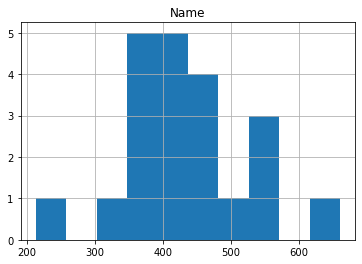

In [83]:
billboard_df.groupby('Year')[['Name']].nunique().hist()


<AxesSubplot:>

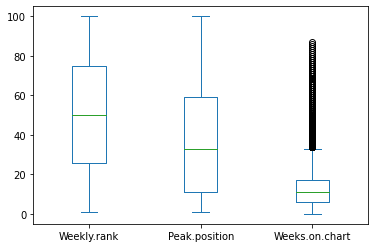

In [84]:
#billboard_df.drop(columns='Unnamed: 0', inplace=True)

billboard_df[['Weekly.rank','Peak.position','Weeks.on.chart']].plot.box()

<AxesSubplot:xlabel='Year', ylabel='Weekly.rank'>

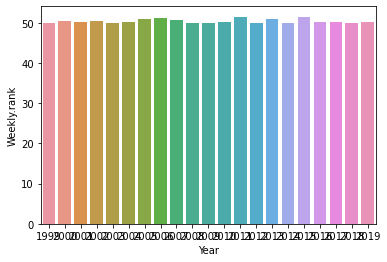

In [85]:
year_avg=billboard_df.groupby('Year')[['Weekly.rank','Peak.position','Weeks.on.chart']].mean()
year_avg.reset_index(inplace=True)

#year_avg
sns.barplot(data=year_avg, x='Year', y='Weekly.rank')

<AxesSubplot:xlabel='Weekly.rank', ylabel='Weeks.on.chart'>

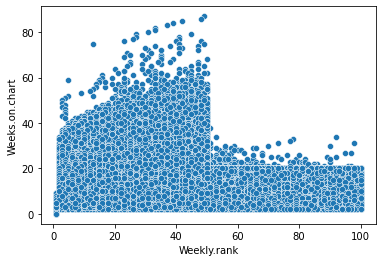

In [86]:
sns.scatterplot(data=billboard_df, x='Weekly.rank', y='Weeks.on.chart')

In [87]:
all_songs.head()

,,top_spot,avg_weekly_rank,total_weeks,year
Name,Artists,,,,
'03 Bonnie & Clyde,Jay,4.0,16.478261,23.0,2002
...Ready For It?,Taylor Swift,4.0,41.736842,20.0,2017
0 To 100 / The Catch Up,Drake,35.0,48.000000,20.0,2014
1,800,3.0,34.414634,42.0,2017
1 Thing,Amerie,8.0,38.900000,20.0,2005


<AxesSubplot:xlabel='year', ylabel='Count'>

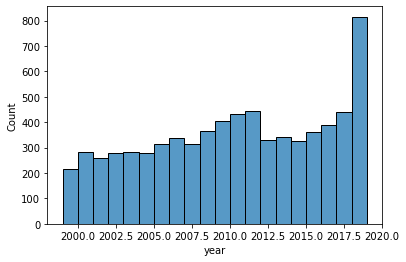

In [88]:
#getting a visual of how many songs hit the top 100 lsit by year. Need to investigate why there are so many for 
# 2018/2019 possible outlier there. 

sns.histplot(data=all_songs, x="year")

In [89]:
all_total_weeks.head()

,,chart_debut_year,total_weeks_on_chart,top_position
Name,Artists,,,
Radioactive,Imagine Dragons,2012,87.0,3.0
Sail,AWOLNATION,2011,79.0,17.0
I'm Yours,Jason Mraz,2008,76.0,6.0
Counting Stars,OneRepublic,2013,68.0,2.0
Rolling In The Deep,Adele,2010,65.0,1.0


<AxesSubplot:xlabel='top_position', ylabel='total_weeks_on_chart'>

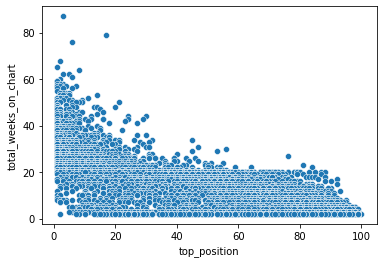

In [90]:
sns.scatterplot(data=all_total_weeks, x="top_position", y="total_weeks_on_chart")

<AxesSubplot:xlabel='top_spot', ylabel='avg_weekly_rank'>

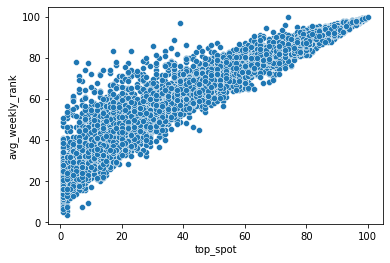

In [91]:
sns.scatterplot(data=all_songs, x="top_spot", y="avg_weekly_rank")

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 